## Learning curves


In [66]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

sns.set("notebook", font_scale=1.05, rc={"figure.figsize": (10, 5)})
sns.set_style("ticks", rc={"figure.facecolor": "none", "axes.facecolor": "none"})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.set_loglevel("WARNING")
mpl.rcParams["lines.markersize"] = 8

# generate datetime string
now = datetime.datetime.now()
now_str = now.strftime("%m_%d_%H_%M")


colors = sns.color_palette("tab10").as_hex()
blue = colors[0]
orange = colors[1]
green = colors[2]
red = colors[3]
purple = "#9d00ff"

In [67]:
import pandas as pd

# Define file paths
base_path = "/home/emerge/gpudrive/examples/experimental/eval/dataframes/wandb/"
collisions_path = base_path + "collisions.csv"
data_path = base_path + "data.csv"
goals_path = base_path + "goals.csv"

# Load dataframes
df_collisions = pd.read_csv(collisions_path)
df_data = pd.read_csv(data_path)
df_goals = pd.read_csv(goals_path)

WINDOW_SIZE = 120

In [68]:
df_data

,global_step,PPO____R_10000__02_18_18_14_02_744 - _step,PPO____R_10000__02_18_18_14_02_744 - _step__MIN,PPO____R_10000__02_18_18_14_02_744 - _step__MAX,PPO____R_10000__02_18_18_14_02_744 - data/coverage,PPO____R_10000__02_18_18_14_02_744 - data/coverage__MIN,PPO____R_10000__02_18_18_14_02_744 - data/coverage__MAX
0,264972,0,0,0,4.89,4.89,4.89
1,2375301,2111004,2111004,2111004,9.51,9.51,9.51
2,2377942,2113343,2113343,2113343,9.51,9.51,9.51
3,4480385,4217673,4217673,4217673,13.90,13.90,13.90
4,4484078,4221487,4221487,4221487,13.90,13.90,13.90
...,...,...,...,...,...,...,...
1893,1994295611,1994031791,1994031791,1994031791,100.00,100.00,100.00
1894,1996211556,1995948379,1995948379,1995948379,100.00,100.00,100.00
1895,1996402483,1996139486,1996139486,1996139486,100.00,100.00,100.00
1896,1998319850,1998056696,1998056696,1998056696,100.00,100.00,100.00


In [69]:
df_collisions['PPO____R_10000__02_18_18_14_02_744 - metrics/total_collisions'].max()

np.float64(2724.0)

In [70]:
global_step = df_collisions['global_step'].rolling(window=WINDOW_SIZE).mean()

START_STEP = 200  # Change this to your desired start step

collisions = df_collisions['PPO____R_10000__02_18_18_14_02_744 - metrics/total_collisions'].copy()
offroad = df_collisions['PPO____R_10000__02_18_18_14_02_744 - metrics/total_off_road'].copy()
goals = df_goals['PPO____R_10000__02_18_18_14_02_744 - metrics/perc_goal_achieved'].copy()
data = df_data['PPO____R_10000__02_18_18_14_02_744 - data/coverage'].copy()
data_global_step = df_data['global_step'].copy()

# Apply rolling mean only after START_STEP
collisions.iloc[START_STEP:] = collisions.iloc[START_STEP:].rolling(window=WINDOW_SIZE).mean()
offroad.iloc[START_STEP:] = offroad.iloc[START_STEP:].rolling(window=WINDOW_SIZE).mean()
goals.iloc[START_STEP:] = goals.iloc[START_STEP:].rolling(window=WINDOW_SIZE).mean()

In [71]:
type(collisions)

pandas.core.series.Series

In [72]:
min_value

np.float64(14.51093463444431)

In [73]:
collisions.iloc[START_STEP:].min()
collisions.idxmin()

88

In [74]:
min_value = collisions[100_000:].dropna().min()

# p
# min_step = collisions[min_value]
# min_step

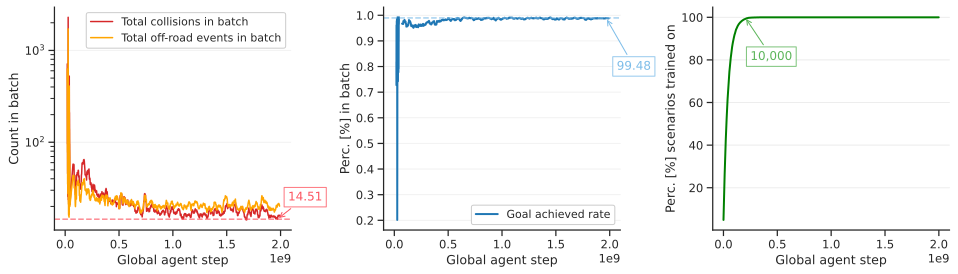

In [121]:
# Ensure `global_step` is a Pandas Series
STEP_THRESHOLD = global_step.max() - 100_000_000

# Lighter shades for annotations
light_red = "#fc5460"
light_blue = "#7dbde9"
light_green = "#5bb559"


# Filter for last 100M steps
valid_indices = global_step[global_step >= STEP_THRESHOLD].index
valid_collisions = collisions.loc[valid_indices].dropna()
valid_steps = global_step.loc[valid_indices]

# Find the minimum collision value in this range
min_idx = valid_collisions.idxmin()
min_value = valid_collisions.loc[min_idx]
min_step = valid_steps.loc[min_idx]

fig, axes = plt.subplots(1, 3, figsize=(13.5, 4), sharex=True)

# First subplot: Plot collisions and offroad, with annotation
sns.lineplot(x=global_step, y=collisions, color=red, label="Total collisions in batch", linewidth=LINEWIDTH, errorbar=('ci', 95), ax=axes[0])
sns.lineplot(x=global_step, y=offroad, color='orange', label="Total off-road events in batch", linewidth=LINEWIDTH, errorbar=('ci', 95), ax=axes[0])
axes[0].set_yscale('log')
axes[0].set_ylabel("Count in batch")
axes[0].legend(loc="best", fontsize=11, facecolor="white", framealpha=1)
axes[0].grid(axis='y', linestyle='-', color='lightgrey', alpha=0.3)

axes[0].axhline(min_value, color=light_red, linestyle="--", alpha=0.7)
axes[0].annotate(
    f"{min_value:.2f}", 
    xy=(min_step, min_value), 
    xytext=(min_step + global_step.max() * 0.05, min_value * 1.6),  
    arrowprops=dict(arrowstyle="->", color=light_red),
    fontsize=12,
    color=light_red,
    bbox=dict(facecolor="white", alpha=0.8, edgecolor=light_red)
)

# Filter goals for last 100M steps
valid_goals = goals.loc[valid_indices].dropna()
valid_steps_goals = global_step.loc[valid_goals.index]

# Find the maximum goal value in this range
max_idx = valid_goals.idxmax()
max_value = valid_goals.loc[max_idx]
max_step = valid_steps_goals.loc[max_idx]

axes[1].plot(global_step, goals, color=blue, label='Goal achieved rate',linewidth=2)
axes[1].legend(fontsize=11, facecolor="white", framealpha=1)
#axes[1].set_yscale('log')
axes[1].grid(axis='y', linestyle='-', color='lightgrey', alpha=0.3)
axes[1].set_ylabel("Perc. [%] in batch")

axes[1].axhline(max_value, color=light_blue, linestyle="--", alpha=0.7)
axes[1].annotate(
    f"{99.48:.2f}", 
    xy=(max_step, max_value), 
    xytext=(max_step + global_step.max() * 0.05, (max_value * 1.2) - 0.4),  
    arrowprops=dict(arrowstyle="->", color=light_blue),
    fontsize=12,
    color=light_blue,
    bbox=dict(facecolor="white", alpha=0.8, edgecolor=light_blue)
)

# Ensure `data_global_step` and `data` exist
axes[2].plot(data_global_step, data, color='green', label="Scenarios", linewidth=2)
axes[2].set_ylabel('Perc. [%] scenarios trained on')
axes[2].grid(axis='y', linestyle='-', color='lightgrey', alpha=0.4)

axes[2].annotate(
    f"10,000", 
    xy=(200e6, 100), 
    xytext=(250e6,80),  
    arrowprops=dict(arrowstyle="->", color=light_green),
    fontsize=12,
    color=light_green,
    bbox=dict(facecolor="white", alpha=0.8, edgecolor=light_green)
)


axes[-1].set_xlabel("Global agent step")
axes[0].set_xlabel("Global agent step")
axes[1].set_xlabel("Global agent step")


plt.tight_layout()
sns.despine()
fig.savefig(f'train_curves.pdf', bbox_inches='tight', format='pdf');


In [76]:
max_value

np.float64(0.9895930407885205)